<a href="https://colab.research.google.com/github/erikaminarikova/Ordinal_Sums/blob/main/Example_6_california_housing_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation of Data

In [47]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [35]:
# identify outliers
from scipy import stats

z = np.abs(stats.zscore(df))
threshold = 3
# remove outliers
df_o = df[(z<3).all(axis=1)]

In [36]:
# normalize the data
columns = df_o.columns
scaler = MinMaxScaler()
model = scaler.fit_transform(df_o)
df_scaled = pd.DataFrame(model, columns = columns)

In [37]:
data = pd.DataFrame()
data = df_scaled[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

data['target'] = df_scaled['MedHouseVal']

In [38]:
data['target'] = data.apply(lambda row: 0 if (row['target']<=0.5)   else 1, axis=1)

In [ ]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.864082,0.784314,0.529080,0.316547,0.066238,0.054379,0.567481,0.216327,1
1,0.861454,0.392157,0.464777,0.292740,0.497924,0.040955,0.565356,0.217347,1
2,0.746174,1.000000,0.641483,0.339303,0.102367,0.061810,0.564293,0.215306,1
3,0.567920,1.000000,0.428507,0.339125,0.115241,0.054150,0.564293,0.214286,1
4,0.369504,1.000000,0.468546,0.342803,0.116694,0.043113,0.564293,0.214286,1
...,...,...,...,...,...,...,...,...,...
19789,0.117091,0.470588,0.361971,0.366758,0.174834,0.054531,0.737513,0.332653,0
19790,0.227126,0.333333,0.454080,0.450404,0.073297,0.071464,0.738576,0.320408,0
19791,0.132517,0.313725,0.375770,0.360687,0.208472,0.047455,0.732200,0.319388,0
19792,0.150979,0.333333,0.386456,0.384447,0.153239,0.041358,0.732200,0.309184,0


In [39]:
# splitting dataframe 1/3 train 2/3 test
df_train, df_test = train_test_split(data, test_size=0.20, random_state=42)

In [9]:
def calculate_tests(target_values, value):
  MSE = mean_squared_error(target_values, value)
  RMSE = math.sqrt(MSE)
  print('Mean squared error = ', MSE)
  print('Root Mean Square Error = ', RMSE)
  print('Accuracy score = ', accuracy_score(target_values, value))
  print('F1 = ', f1_score(target_values, value, average= 'macro'))
  print('Precision = ', precision_score(target_values, value, average= 'macro'))
  print('Recall = ', recall_score(target_values, value, average= 'macro'))
  #confusion matrix
  confusion_matrix = metrics.confusion_matrix(target_values, value)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
  #confucion matrif for 3 target classes
  #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
  cm_display.plot()
  plt.show()

Logistic Regression

In [10]:
# Reshaped for logistic regression function
X = df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_train[["target"]]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error =  0.13495421534575308
Root Mean Square Error =  0.36736115111120976
Accuracy score =  0.865045784654247
F1 =  0.808325585929111
Precision =  0.8424793836313894
Recall =  0.7866592587073002


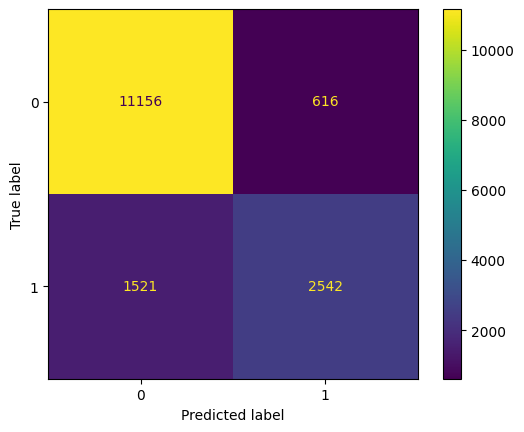

time: 0.003787585099538167


In [49]:
start_time = time.time()
logr = linear_model.LogisticRegression()
logr.fit(X,y)
#predict for all input values
predicted=logr.predict(X)
df_train["predicted"]=predicted
# calculate tests for train dataset
target_values = df_train[['target']].values
value = df_train[['predicted']].values
calculate_tests(target_values, value)
print('time:', (time.time()-start_time)/60)

In [12]:
print(logr.coef_, logr.intercept_)

[[ 10.73962047   1.84689197  -3.34078361   5.81000242   0.31916715
  -16.14879871 -10.89033822 -11.47897216]] [2.75946328]


In [16]:
X_t = df_test[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y_t = df_test[["target"]]

In [17]:
predicted=logr.predict(X_t)

In [18]:
df_test['predicted_test'] = predicted

Mean squared error =  0.14043950492548624
Root Mean Square Error =  0.3747525916194393
Accuracy score =  0.8595604950745138
F1 =  0.7936921576169557
Precision =  0.8323401608687248
Recall =  0.7703315229875628


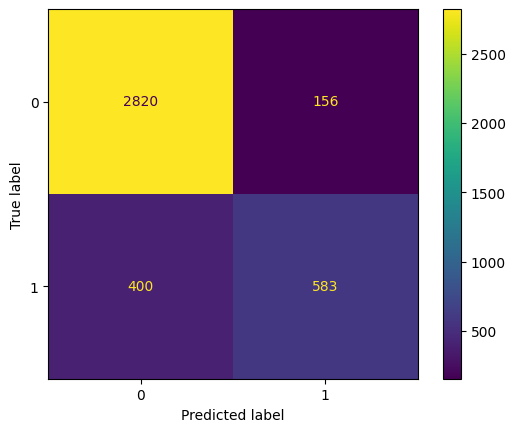

In [19]:
# calculate tests for test data
target_values = df_test[['target']].values
value = df_test[['predicted_test']].values
calculate_tests(target_values, value)

Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [40]:
X = df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_train[["target"]]

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error =  0.18800126302494474
Root Mean Square Error =  0.43359112424603985
Accuracy score =  0.8119987369750552
F1 =  0.6702548544938046
Precision =  0.8475390404187553
Recall =  0.645894482659245


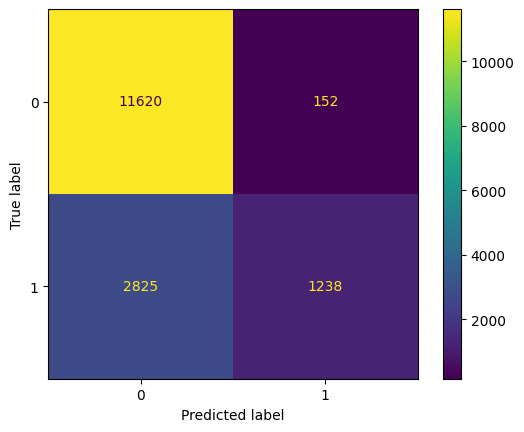

time: 0.018153635660807292


In [48]:
start_time = time.time()
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
predicted=clf.predict(X)
df_train["predicted"]=predicted
target_values = df_train[['target']].values
value = df_train[['predicted']].values
calculate_tests(target_values, value)
print('time:', (time.time()-start_time)/60)

In [44]:
X_t = df_test[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [45]:
predicted=clf.predict(X_t)
df_test["predicted"]=predicted

In [ ]:
# calculate tests for test data
target_values = df_test[['target']].values
value = df_test[['predicted']].values
calculate_tests(target_values, value)

Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
X = df_train[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_train[["target"]]

Mean squared error =  0.17865487843384906
Root Mean Square Error =  0.42267585504006383
Accuracy score =  0.8213451215661509
F1 =  0.7549167803479445
Precision =  0.7691082168085673
Recall =  0.7442927957887866


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


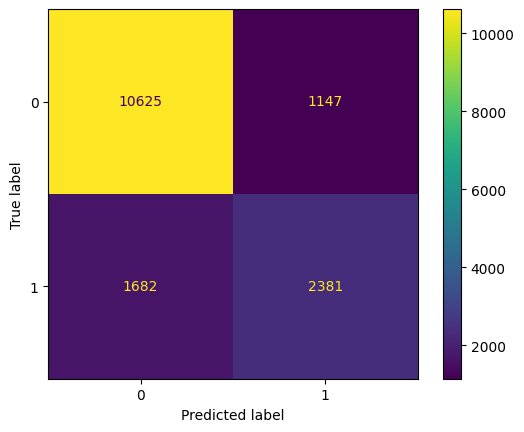

time: 0.0024617632230122884


In [50]:
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X, y)
predicted=gnb.predict(X)
df_train["predicted"]=predicted
# calculate tests for train data
target_values = df_train[['target']].values
value = df_train[['predicted']].values
calculate_tests(target_values, value)
print('time:', (time.time()-start_time)/60)

In [51]:
predicted=gnb.predict(X_t)
df_test["predicted"]=predicted

Mean squared error =  0.17984339479666583
Root Mean Square Error =  0.42407946754902653
Accuracy score =  0.8201566052033342
F1 =  0.7485208198619099
Precision =  0.7613217518361823
Recall =  0.7386716656274954


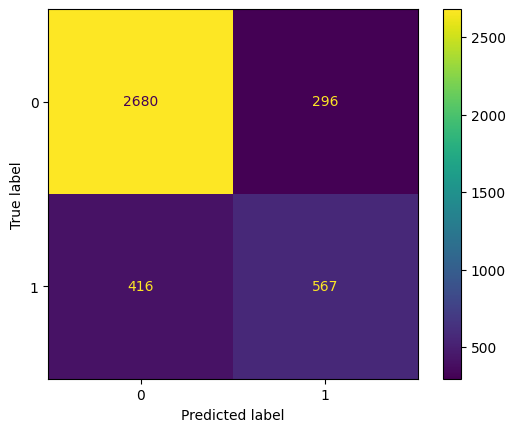

In [52]:
# calculate tests for test data
target_values = df_test[['target']].values
value = df_test[['predicted']].values
calculate_tests(target_values, value)

In [ ]:
df_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,predicted_test,predicted
17298,0.882500,0.666667,0.511942,0.324788,0.386836,0.058391,0.497343,0.243878,1,1,1
17930,0.351737,0.176471,0.506048,0.367698,0.219684,0.075735,0.859724,0.205102,0,0,0
4031,0.209635,0.843137,0.264338,0.377597,0.249377,0.082824,0.166844,0.629592,0,0,0
3699,0.334092,0.235294,0.241546,0.313634,0.387043,0.047524,0.176408,0.601020,0,0,0
17294,0.980930,0.392157,0.676985,0.333466,0.375415,0.074810,0.497343,0.246939,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9727,0.396347,0.666667,0.381133,0.298116,0.218646,0.064309,0.148778,0.651020,0,0,0
7489,0.241415,0.352941,0.268994,0.300560,0.253115,0.058836,0.147715,0.634694,0,0,0
12071,0.163844,0.705882,0.339651,0.312070,0.186669,0.053721,0.636557,0.292857,0,0,0
17201,0.470451,0.686275,0.374813,0.251863,0.153032,0.046199,0.509033,0.244898,1,1,0
